# Data analysis of $\text{CO}_2$ emissions

This is a basic exploratory analysis of the global $\text{CO}_2$ emissions. I use the Our World in Data (owid) datasets through their Python API `owid-catalog`.

To install their api: `pip install owid-catalog`.

In [20]:
from owid import catalog
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

We find which datasets contain data about $\text{CO}_2$

In [21]:
catalog.find('co2')

,table,dataset,version,namespace,channel,is_public,dimensions,path,formats
1377,_9_4_1_en_atm_co2,un_sdg,2023-01-24,un,garden,True,"[country, year, goal, target, indicator, serie...",garden/un/2023-01-24/un_sdg/_9_4_1_en_atm_co2,[feather]
1378,_9_4_1_en_atm_co2,un_sdg,2023-08-16,un,garden,True,"[country, year, goal, target, indicator, serie...",garden/un/2023-08-16/un_sdg/_9_4_1_en_atm_co2,[feather]
1379,_9_4_1_en_atm_co2gdp,un_sdg,2023-01-24,un,garden,True,"[country, year, goal, target, indicator, serie...",garden/un/2023-01-24/un_sdg/_9_4_1_en_atm_co2gdp,[feather]
1380,_9_4_1_en_atm_co2gdp,un_sdg,2023-08-16,un,garden,True,"[country, year, goal, target, indicator, serie...",garden/un/2023-08-16/un_sdg/_9_4_1_en_atm_co2gdp,[feather]
1381,_9_4_1_en_atm_co2mva,un_sdg,2023-01-24,un,garden,True,"[country, year, goal, target, indicator, serie...",garden/un/2023-01-24/un_sdg/_9_4_1_en_atm_co2mva,[feather]
1382,_9_4_1_en_atm_co2mva,un_sdg,2023-08-16,un,garden,True,"[country, year, goal, target, indicator, serie...",garden/un/2023-08-16/un_sdg/_9_4_1_en_atm_co2mva,[feather]
3867,co2_air_transport,co2_air_transport,2023-05-19,oecd,garden,True,"[country, year]",garden/oecd/2023-05-19/co2_air_transport/co2_a...,[feather]
3868,co2_mitigation_curves_1p5celsius,co2_mitigation_curves,2019-12-03,andrew,garden,True,"[year, origin]",garden/andrew/2019-12-03/co2_mitigation_curves...,[feather]
3869,co2_mitigation_curves_2celsius,co2_mitigation_curves,2019-12-03,andrew,garden,True,"[year, origin]",garden/andrew/2019-12-03/co2_mitigation_curves...,[feather]
9915,owid_co2,owid_co2,2023-05-03,emissions,garden,True,"[country, year]",garden/emissions/2023-05-03/owid_co2/owid_co2,[feather]


The one that interests us is the `owid_co2` from `2023-07-10`, in the garden channel (garden means that the data has already been preprocessed and cleaned for easier analysis)

In [22]:
co2_emissions = pd.DataFrame(catalog.find('co2', namespace = 'emissions', version='2023-07-10').load()) # load latest version of the emissions dataset

In [23]:
co2_emissions

co2  co2_per_capita  trade_co2  cement_co2  \
country     year                                                     
Afghanistan 1850        NaN             NaN        NaN         NaN   
            1851        NaN             NaN        NaN         NaN   
            1852        NaN             NaN        NaN         NaN   
            1853        NaN             NaN        NaN         NaN   
            1854        NaN             NaN        NaN         NaN   
...                     ...             ...        ...         ...   
Zimbabwe    2017   9.596071        0.650533   0.910308    0.468867   
            2018  11.795478        0.783639   0.771109    0.557990   
            2019  11.114607        0.723861   0.977537    0.569615   
            2020  10.607897        0.676970   1.005721    0.569615   
            2021  11.296114        0.706293        NaN    0.569615   

                  cement_co2_per_capita  coal_co2  coal_co2_per_capita  \
country     year                                                         
Afghanistan 1850                    NaN       NaN                  NaN   
            1851                    NaN       NaN                  NaN   
            1852                    NaN       NaN                  NaN   
            1853                    NaN       NaN                  NaN   
            1854                    NaN       NaN                  NaN   
...                                 ...       ...                  ...   
Zimbabwe    2017               0.031785  5.900452             0.400001   
            2018               0.037070  7.177776             0.476859   
            2019               0.037097  6.888320             0.448616   
            2020               0.036351  6.721571             0.428954   
            2021               0.035615  7.225620             0.451784   

                  flaring_co2  flaring_co2_per_capita  gas_co2  ...  methane  \
country     year                                                ...            
Afghanistan 1850          NaN                     NaN      NaN  ...      NaN   
            1851          NaN                     NaN      NaN  ...      NaN   
            1852          NaN                     NaN      NaN  ...      NaN   
            1853          NaN                     NaN      NaN  ...      NaN   
            1854          NaN                     NaN      NaN  ...      NaN   
...                       ...                     ...      ...  ...      ...   
Zimbabwe    2017          0.0                     0.0      0.0  ...    12.12   
            2018          0.0                     0.0      0.0  ...    12.44   
            2019          0.0                     0.0      0.0  ...    12.68   
            2020          0.0                     0.0      0.0  ...      NaN   
            2021          0.0                     0.0      0.0  ...      NaN   

                  methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
country     year                                                                
Afghanistan 1850                 NaN            NaN                       NaN   
            1851                 NaN            NaN                       NaN   
            1852                 NaN            NaN                       NaN   
            1853                 NaN            NaN                       NaN   
            1854                 NaN            NaN                       NaN   
...                              ...            ...                       ...   
Zimbabwe    2017            0.821634           5.24                  0.355228   
            2018            0.826458           5.43                  0.360745   
            2019            0.825811           5.50                  0.358199   
            2020                 NaN            NaN                       NaN   
            2021                 NaN            NaN                       NaN   

                  primary_energy_consumption  energy_pe

More information on the columns can be found here: [https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv).

The DataFrame has MultiIndex, so we need to slice accordingly to retrieve the data that interest us.

In [24]:
idx = pd.IndexSlice
co2_emissions.loc[idx[:, 2021], idx['co2', 'iso_code']]

,,co2,iso_code
country,year,,
Afghanistan,2021,11.874211,AFG
Africa,2021,1450.796265,NaN
Africa (GCP),2021,1450.782593,NaN
Aland Islands,2021,NaN,ALA
Albania,2021,4.619109,ALB
...,...,...,...
Western Sahara,2021,NaN,ESH
World,2021,37123.851562,NaN
Yemen,2021,12.476597,YEM


## Analysis of global $\text{CO}_2$ emissions worldwide

In [25]:
global_co2 = pd.DataFrame(co2_emissions.xs('World').co2)
global_co2.head()
global_co2.tail()

,co2
year,
2017,36096.738281
2018,36826.507812
2019,37082.558594
2020,35264.085938
2021,37123.851562


In [26]:
global_co2.describe()

,co2
count,272.000000
mean,6385.771973
std,10124.916992
min,9.350528
25%,49.590407
50%,1017.573425
75%,6683.314209
max,37123.851562


The information we can get from the above statistics are that:
- we have data for the past 272 years,
- The average yearly emissions of $\text{CO}_2$ over these 272 years is $6385.77$ million tones per year,
- We have a huge standard deviation of $10`124.92$ million tones,
- The lowest amount of $\text{CO}_2$ emitted was $9.35$ million tones, and the most we emitted was $37`123.85$ million tones
- We emitted less that $6'683.31$ million tones of $\text{CO}_2$ 75% of the time, meaning that 25% of the time, or for 68 years, we emitted more than $6'683.31$ million tones of $\text{CO}_2$.

Let us find the years we emitted the lowest, the largest amount of $\text{CO}_2$, and the years we emitted more that $6683.31$ million tones of $\text{CO}_2$.

In [27]:
print('Year for which we emitted the lowest amount of CO2: ', global_co2.co2.idxmin()) # idxmin() return the index (here the year) for which the minimum is reached
print('Year for which we emitted the largest amount of CO2: ', global_co2.co2.idxmax()) # idxmax() is similar for the maximum
print('Years we emitted > 6683.31 million tones of CO2: ', list(global_co2[global_co2.co2 > 6683.314209].index))
print('Number of years: ', len(list(global_co2[global_co2.co2 > 6683.314209].index)))

Year for which we emitted the lowest amount of CO2:  1750
Year for which we emitted the largest amount of CO2:  2021
Years we emitted > 6683.31 million tones of CO2:  [1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Number of years:  68


Thus we see that the lowest amount was emitted the first year we have records, and the largest amount was recorded the last year we have records. Moreover, for the last 68 years, we emitted more than $6'683.31$ million tones of $\text{CO}_2$.

Let us visualize the emissions graphically.

[Text(0.5, 1.0, 'Global CO2 emissions worldwide, in millions of tones')]

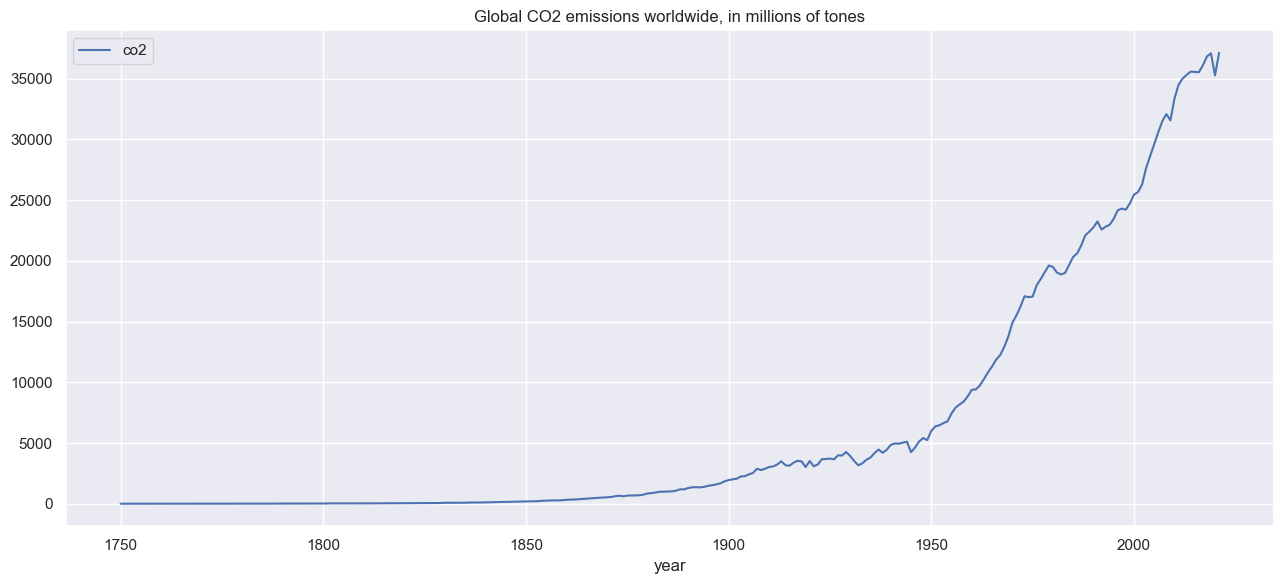

In [28]:
sns.set_theme(style='darkgrid')
sns.lineplot(data=global_co2).set(title='Global CO2 emissions worldwide, in millions of tones')

The trend looks exponential. We can do an exponential regression of the data by taking the $\log$ of the emissions, do a linear regression, and retransform the data by taking the exponential.  
Assume that our linear regression has the form $\log(y(t)) = a + b \cdot t$, where $t$ denotes the years, $a$ and $b$ are the parameters of the linear regression and $y(t)$ approximates the $\text{CO}_2$ emissions. Then the emissions are approximated by 
$$y(t) = \exp(a + b \cdot t) = \exp(a) \cdot \exp(b \cdot t).$$
We use `LinearRegression` from the Python library `sklearn.linear_model` to perform the linear regression. The parameter $a$ is given by `LinearRegression().intercept_` and the parameter $b$ by `LinearRegression().coef_[0]`. 

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array(global_co2.co2.index).reshape(-1,1), np.log(global_co2.co2))

LinearRegression()

Let us use the model to try to predict what could happen by 2030.

[Text(0.5, 1.0, 'Global CO2 emissions, in millions of tones')]

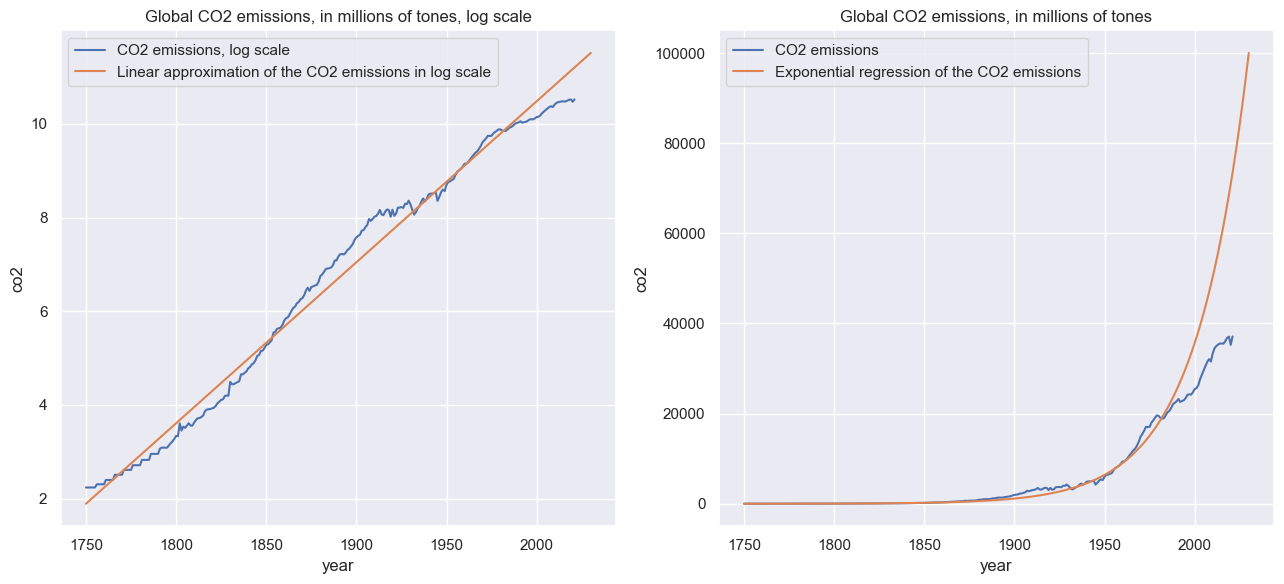

In [30]:
plt.rcParams['figure.figsize'] = [13, 6]
plt.rcParams['figure.autolayout']=True
f, axes = plt.subplots(1, 2)
sns.lineplot(data=(np.log(global_co2.co2)), ax=axes[0], label='CO2 emissions, log scale')
X = np.concatenate((np.array(global_co2.co2.index), np.array(range(2022,2031))))
sns.lineplot(x=X, y=model.intercept_ + model.coef_[0]*X, ax=axes[0], label='Linear approximation of the CO2 emissions in log scale').set(title="Global CO2 emissions, in millions of tones, log scale")


sns.lineplot(data=global_co2.co2, ax=axes[1], label = "CO2 emissions")
sns.lineplot(x=X, y=np.exp(model.intercept_) * np.exp(X*model.coef_[0]), ax=axes[1], label = "Exponential regression of the CO2 emissions").set(title="Global CO2 emissions, in millions of tones")

We see that our regression until roughly the '80s, but then it overshoots greatly the values. Thus the exponential regression is not accurate to predict what will happen in 2030. This means at least that we stopped being on an exponential trend, and although the amount of $\text{CO}_2$ we emit still increases, the increase is not exponential.

Let us try, without comparing the models here, nor optimizing hyperparameters, another type of regression. Let us try a regression model for non linear function, such a Polynomial regression of degree 5

[Text(0.5, 1.0, 'Global CO2 emissions, in millions of tones')]

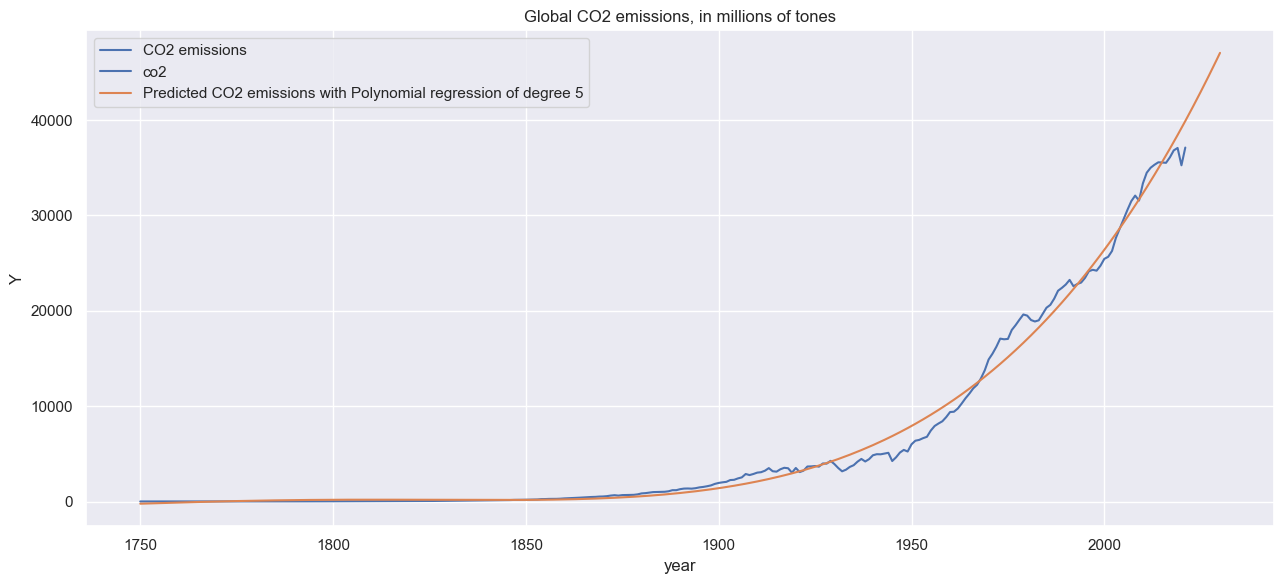

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=5)
x_poly = poly_reg.fit_transform(np.array(global_co2.co2.index).reshape(-1,1))

model = LinearRegression()

model.fit(x_poly, global_co2.co2)
x_poly = poly_reg.fit_transform(np.concatenate((global_co2.co2.index, np.array(range(2022, 2031)))).reshape(-1,1))
predictions = model.predict(x_poly)
tmp_df = pd.DataFrame({'X': np.concatenate((global_co2.co2.index, np.array(range(2022, 2031)))), 'Y': predictions})

sns.lineplot(data=global_co2, errorbar='sd',label = "CO2 emissions")
sns.lineplot(data = tmp_df, x = 'X', y = 'Y', label="Predicted CO2 emissions with Polynomial regression of degree 5").set(title="Global CO2 emissions, in millions of tones")

This regression is much more satisfying in the sense that it fits the known data rather closely and does not overshoot the current data as much as our exponential regression. On the other hand, it may be worrying that the rate at which the amount of $\text{CO}_2$ emissions increases can be estimated by a degree 5 polynomial.

### Global $\text{CO}_2$ emissions, breakdown analysis

Looking at [https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv), the $\text{CO}_2$ emissions are broken down in different categories, which are labelled as `xxx_co2` where `xxx` represent the category. Let's find the matching expressions, and then keep the one that interest us.

In [32]:
# We use the module re to create a regular expression that will match our pattern
import re

# the patterns we are interested are of the form xxx_co2
# (?=$|[^_]) is a positive lookahead assertion that checks for the end of the string ($)
# or any character that is not an underscore ([^_]) immediately following _co2.
pattern = r'\w+_co2(?=$|[^_])'

# We keep the matching patterns in a list
matching_expressions = [s for s in list(co2_emissions.columns) if re.match(pattern, s)]
print(matching_expressions)

['trade_co2', 'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2', 'consumption_co2', 'cumulative_co2', 'cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'share_global_co2', 'share_global_cement_co2', 'share_global_coal_co2', 'share_global_flaring_co2', 'share_global_gas_co2', 'share_global_oil_co2', 'share_global_other_co2', 'share_global_cumulative_co2', 'share_global_cumulative_cement_co2', 'share_global_cumulative_coal_co2', 'share_global_cumulative_flaring_co2', 'share_global_cumulative_gas_co2', 'share_global_cumulative_oil_co2', 'share_global_cumulative_other_co2', 'cumulative_luc_co2', 'share_global_cumulative_luc_co2', 'land_use_change_co2', 'share_global_luc_co2', 'temperature_change_from_co2']


We have the expression that interest us, and some additional one. Let us modify the regexp to remove expressions containing `cumulative`, or `share`.

In [33]:
pattern = r'(?!cumulative|share)\w+_co2(?=$|[^_])'
matching_expressions = [s for s in list(co2_emissions.columns) if re.match(pattern, s)]
print(sorted(matching_expressions))

['cement_co2', 'coal_co2', 'consumption_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2', 'other_industry_co2', 'temperature_change_from_co2', 'trade_co2']


We can work with the result above, discarding `temperature_change_from_co2`. Let's make a summary table:
| **Column**   | **Description**| 
|--------------|------------------|
| `cement_co2` | Annual production-based emissions of carbon dioxide (CO₂) from cement, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods. |
| `coal_co2`   | Annual production-based emissions of carbon dioxide (CO₂) from coal, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.  |
|`consumption_co2`| Annual consumption-based emissions of carbon dioxide (CO₂), measured in million tonnes. Consumption-based emissions are national or regional emissions which have been adjusted for trade (i.e. territorial/production emissions minus emissions embedded in exports, plus emissions embedded in imports). If a country's consumption-based emissions are higher than its production emissions it is a net importer of carbon dioxide. Data has been converted by Our World in Data from million tonnes of carbon to million tonnes of CO₂ using a conversion factor of 3.664.       |
|`flaring_co2`| Annual production-based emissions of carbon dioxide (CO₂) from flaring, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.|
|`gas_co2`|  Annual production-based emissions of carbon dioxide (CO₂) from gas, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.      |
|`land_use_change_co2`| Annual production-based emissions of carbon dioxide (CO₂) from land-use change, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.       |
|`oil_co2`|Annual production-based emissions of carbon dioxide (CO₂) from oil, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.|
|`other_industry_co2`|Annual production-based emissions of carbon dioxide (CO₂) from other industry sources, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.|
|`trade_co2`| Annual net carbon dioxide (CO₂) emissions embedded in trade, measured in million tonnes. Net CO₂ emissions embedded in trade is the net of CO₂ which is imported or exported via traded goods with an economy. A positive value denotes a country or region is a net importer of CO₂ emissions; a negative value indicates a country is a net exporter.       |

In [34]:
# We keep the column that interest us, and only care for the worldwide values for now
co2_breakdown = co2_emissions[['cement_co2', 'coal_co2', 'consumption_co2', 'flaring_co2',
'gas_co2', 'land_use_change_co2', 'oil_co2', 'other_industry_co2', 'trade_co2']].xs('World')
co2_breakdown.head()

,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2
year,,,,,,,,,
1750,NaN,9.350528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1751,NaN,9.350528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,NaN,9.354192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1753,NaN,9.354192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1754,NaN,9.357856,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As before, let us check the basic statistics of our data

In [35]:
co2_breakdown.describe()

,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2
count,142.000000,272.000000,32.000000,72.000000,140.000000,172.000000,167.000000,118.000000,32.000000
mean,317.372711,2956.580811,29734.914062,256.309509,1814.698608,4316.805176,3625.608887,82.069550,-0.000512
std,453.690063,3944.631592,5335.533691,114.017647,2326.854736,1051.212646,4430.704102,107.362854,0.002207
min,0.000172,9.350528,22580.023438,73.624413,0.164880,2394.546143,0.036640,1.320300,-0.004096
25%,0.148120,49.590407,24280.253906,159.925049,36.137394,3650.351562,54.051075,2.750625,-0.002048
50%,71.409081,991.485687,30103.859375,250.638031,431.635681,4428.004883,821.515991,31.014206,0.000000
75%,435.955017,4047.788696,35277.867188,371.228424,3167.370605,5005.451172,8443.333984,216.138885,0.000000
max,1672.592407,15051.512695,37123.851562,439.253998,7921.829590,7104.862793,12345.653320,306.638580,0.004096


I do not have much to say looking at these statistics, except that most of the $\text{CO}_2$ seems to be emitted from the consumption. One funny thing if we look at the trade column, one would expect the average $\text{CO}_2$ emissions from trade to be $0$ by definition, but a negative sign implies that we are a net exporter. Does this include the garbage we send into space and the space missions, or are we trading with aliens lol?

Let us plot the data to get more intuition

Text(0.5, 1.0, 'Total CO2 emissions by category')

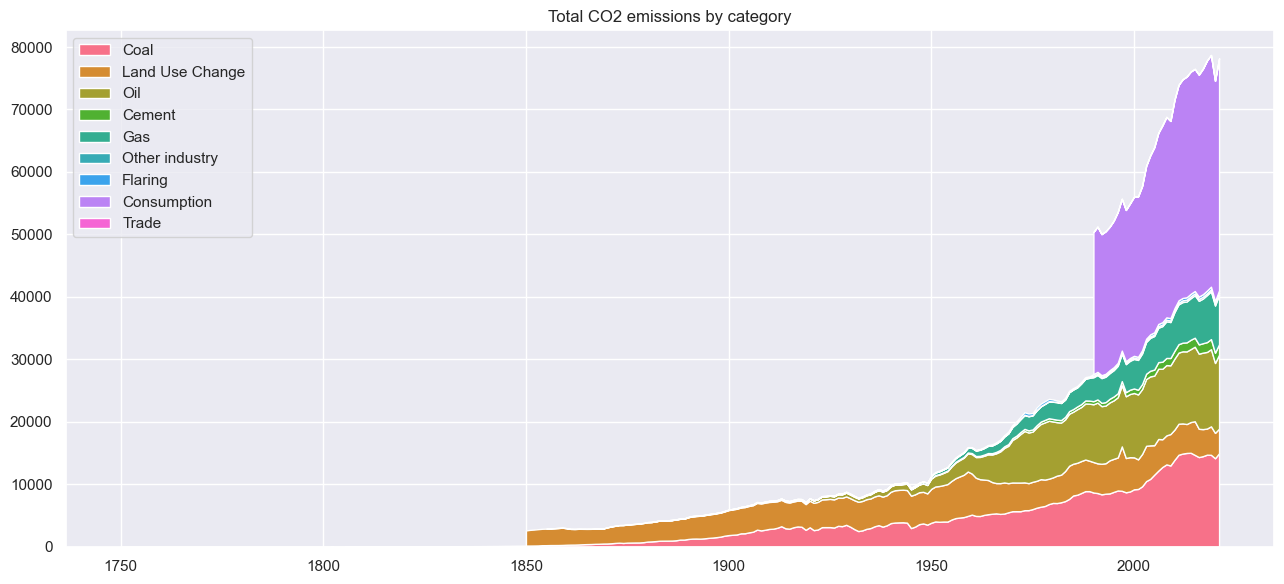

In [36]:
sns.set_theme(palette=sns.color_palette("husl", n_colors=9))

plt.stackplot(co2_breakdown.index, 
co2_breakdown.coal_co2,
co2_breakdown.land_use_change_co2, 
co2_breakdown.oil_co2,
co2_breakdown.cement_co2, 
co2_breakdown.gas_co2,
co2_breakdown.other_industry_co2,
co2_breakdown.flaring_co2, 
co2_breakdown.consumption_co2, 
co2_breakdown.trade_co2,
labels = ['Coal',
'Land Use Change', 
'Oil', 
'Cement',
'Gas',
'Other industry',
'Flaring',
'Consumption',
'Trade'])
plt.legend(loc='upper left')
plt.title("Total CO2 emissions by category")

As observed before, Consumption is the primary source of $\text{CO}_2$ emissions. Let us make another visualisation, this time using percentages.

Text(0.5, 1.0, 'Proportion of CO2 emissions by category')

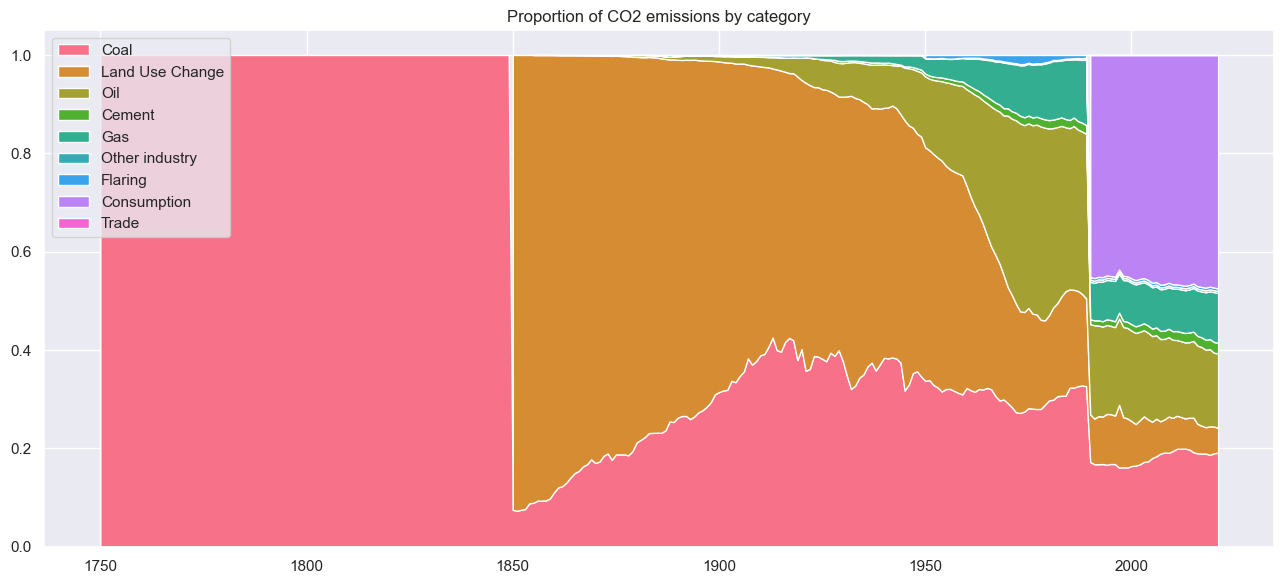

In [37]:
sns.set_theme(palette=sns.color_palette("husl", n_colors=9))

normalized_co2_breakdown = co2_breakdown.div(co2_breakdown.sum(axis=1), axis=0) # this normalizes our DataFrame for the visualization

plt.stackplot(normalized_co2_breakdown.index, 
normalized_co2_breakdown.coal_co2,
normalized_co2_breakdown.land_use_change_co2, 
normalized_co2_breakdown.oil_co2,
normalized_co2_breakdown.cement_co2, 
normalized_co2_breakdown.gas_co2,
normalized_co2_breakdown.other_industry_co2,
normalized_co2_breakdown.flaring_co2, 
normalized_co2_breakdown.consumption_co2, 
normalized_co2_breakdown.trade_co2, 
labels = ['Coal',
'Land Use Change', 
'Oil', 
'Cement',
'Gas',
'Other industry',
'Flaring',
'Consumption',
'Trade'])
plt.legend(loc='upper left')

plt.title("Proportion of CO2 emissions by category")

For fun, let's plot these visualisations again, but with `plotly` so that we have a slightly more interactive vision of the data

In [131]:
pd.options.plotting.backend = "plotly"

fig = co2_breakdown.plot.area(template="seaborn")
fig.show()

In [132]:
fig = normalized_co2_breakdown.plot.area(template="seaborn")
fig.show()

What we see from these plots, is that most of the $\text{CO}_2$ is emitted from the consumption (~48% in 2021), and coal and oil (~19% and 15% in 2021). Reducing these variables would amount to a substantial reduction in $\text{CO}_2$ emissions. However, it is not going in the right direction, consumption is still increasing, and coal looks like it may increase again in 2022 and 2023 (e.g. Germany reopend coal mines due to the Ukraine war).

### $\text{CO}_2$ emissions, by country

Let us now breakdown the emissions by country. I am especially interested in the countries, let's say the 25%, that emit the most $\text{CO}_2$

In [136]:
co2_emissions.head()

co2  co2_per_capita  trade_co2  cement_co2  \
country     year                                               
Afghanistan 1850  NaN             NaN        NaN         NaN   
            1851  NaN             NaN        NaN         NaN   
            1852  NaN             NaN        NaN         NaN   
            1853  NaN             NaN        NaN         NaN   
            1854  NaN             NaN        NaN         NaN   

                  cement_co2_per_capita  coal_co2  coal_co2_per_capita  \
country     year                                                         
Afghanistan 1850                    NaN       NaN                  NaN   
            1851                    NaN       NaN                  NaN   
            1852                    NaN       NaN                  NaN   
            1853                    NaN       NaN                  NaN   
            1854                    NaN       NaN                  NaN   

                  flaring_co2  flaring_co2_per_capita  gas_co2  ...  methane  \
country     year                                                ...            
Afghanistan 1850          NaN                     NaN      NaN  ...      NaN   
            1851          NaN                     NaN      NaN  ...      NaN   
            1852          NaN                     NaN      NaN  ...      NaN   
            1853          NaN                     NaN      NaN  ...      NaN   
            1854          NaN                     NaN      NaN  ...      NaN   

                  methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
country     year                                                                
Afghanistan 1850                 NaN            NaN                       NaN   
            1851                 NaN            NaN                       NaN   
            1852                 NaN            NaN                       NaN   
            1853                 NaN            NaN                       NaN   
            1854                 NaN            NaN                       NaN   

                  primary_energy_consumption  energy_per_capita  \
country     year                                                  
Afghanistan 1850                         NaN                NaN   
            1851                         NaN                NaN   
            1852                         NaN                NaN   
            1853                         NaN                NaN   
            1854                         NaN                NaN   

                  energy_per_gdp  gdp  population  iso_code  
country     year                                             
Afghanistan 1850             NaN  NaN     3752993       AFG  
            1851             NaN  NaN     3767956       AFG  
            1852             NaN  NaN     3783940       AFG  
            1853             NaN  NaN     3800954       AFG  
            1854             NaN  NaN     3818038       AFG  

[5 rows x 77 columns]

In [144]:
# We remove the continents and world data (each country theoretically has an iso_code, while continents and world do not)
co2_countries = co2_emissions[co2_emissions['iso_code'].notna()]
print(co2_emissions.shape, co2_countries.shape)

(50598, 77) (42142, 77)


In [151]:
# let's make sure we did not remove countries by accidents
pd.DataFrame(co2_emissions[co2_emissions['iso_code'].isna()].loc[idx[:, 2021], idx['iso_code']])

,,iso_code
country,year,
Africa,2021,NaN
Africa (GCP),2021,NaN
Asia,2021,NaN
Asia (GCP),2021,NaN
Asia (excl. China and India),2021,NaN
Central America (GCP),2021,NaN
Europe,2021,NaN
Europe (GCP),2021,NaN
Europe (excl. EU-27),2021,NaN


For some reason, Kosovo is omitted. Let's add it again to the DataFrame

In [155]:
co2_countries = co2_emissions[co2_emissions['iso_code'].notna()]
co2_countries.append(co2_emissions.loc[idx['Kosovo', :], idx[:]])

C:\Users\lhayez\AppData\Local\Temp\ipykernel_287932\694419506.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



co2  co2_per_capita  trade_co2  cement_co2  \
country     year                                                    
Afghanistan 1850       NaN             NaN        NaN         NaN   
            1851       NaN             NaN        NaN         NaN   
            1852       NaN             NaN        NaN         NaN   
            1853       NaN             NaN        NaN         NaN   
            1854       NaN             NaN        NaN         NaN   
...                    ...             ...        ...         ...   
Kosovo      2017  8.093776        4.673971        NaN    0.326096   
            2018  8.148736        4.765438        NaN    0.333424   
            2019  8.496816        5.037073        NaN    0.318631   
            2020  8.521778        5.100717        NaN    0.318768   
            2021  5.644358        3.396079        NaN    0.318768   

                  cement_co2_per_capita  coal_co2  coal_co2_per_capita  \
country     year                                                         
Afghanistan 1850                    NaN       NaN                  NaN   
            1851                    NaN       NaN                  NaN   
            1852                    NaN       NaN                  NaN   
            1853                    NaN       NaN                  NaN   
            1854                    NaN       NaN                  NaN   
...                                 ...       ...                  ...   
Kosovo      2017               0.188313  5.602256             3.235175   
            2018               0.194989  5.664544             3.312665   
            2019               0.188890  5.944109             3.523780   
            2020               0.190799  6.112784             3.658812   
            2021               0.191795  3.216723             1.935427   

                  flaring_co2  flaring_co2_per_capita  gas_co2  ...  methane  \
country     year                                                ...            
Afghanistan 1850          NaN                     NaN      NaN  ...      NaN   
            1851          NaN                     NaN      NaN  ...      NaN   
            1852          NaN                     NaN      NaN  ...      NaN   
            1853          NaN                     NaN      NaN  ...      NaN   
            1854          NaN                     NaN      NaN  ...      NaN   
...                       ...                     ...      ...  ...      ...   
Kosovo      2017          0.0                     0.0      0.0  ...      NaN   
            2018          0.0                     0.0      0.0  ...      NaN   
            2019          0.0                     0.0      0.0  ...      NaN   
            2020          0.0                     0.0      0.0  ...      NaN   
            2021          0.0                     0.0      0.0  ...      NaN   

                  methane_per_capita  nitrous_oxide  nitrous_oxide_per_capita  \
country     year                                                                
Afghanistan 1850                 NaN            NaN                       NaN   
            1851                 NaN            NaN                       NaN   
            1852                 NaN            NaN                       NaN   
            1853                 NaN            NaN                       NaN   
            1854                 NaN            NaN                       NaN   
...                              ...            ...                       ...   
Kosovo      2017                 NaN            NaN                       NaN   
            2018                 NaN            NaN                       NaN   
            2019                 NaN            NaN                       NaN   
            2020                 NaN            NaN                       NaN   
            2021                 NaN            NaN                       NaN   

                  primary_energy_consumption  energy_per_capita  \
